## HW-2 • Math 189 • Wi 2024
### Due Date: Sat, Feb 10th 2024

> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://ucsd-math189-wi24.github.io/syllabus.html#assignments)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import statistics

## Configurations
%matplotlib inline

# Question 1

For this question, we will use the following dataset from the UCI Machine Learning Repository: [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). To load the dataset, you can use the `ucimlrepo` package in Python. Uncomment the following cell to install the package

In [247]:
!pip install ucimlrepo

You can load the dataset using the following code:

In [269]:
import ucimlrepo
heart_disease = ucimlrepo.fetch_ucirepo(id=45) 
df = heart_disease.data.features

> a. Load the dataset and display the first 5 rows of the dataset.

In [270]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


> b. Create a boxplot of the cholesterol level for each sex in the dataset. Color them differently for each sex. 

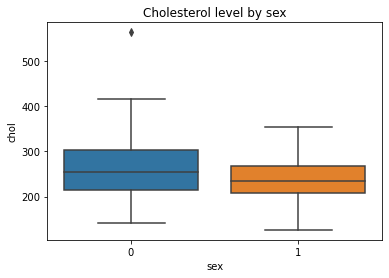

In [250]:
sns.boxplot(data=df, x='sex', y='chol')
plt.title("Cholesterol level by sex");

> c. Read the description of the dataset and determine which of `MALE` and `FEMALE` the variable values `sex=1` vs `sex=0` correspond to.

**Answer**: 1 = male, 0 = female

> d. Using your answer from part c, which of the two sexes has a higher median cholesterol level? Is there reason to believe that there is a difference in the cholesterol levels between the two sexes? Explain your answer

**Answer**: Female has a higher median cholesterol level. Although the female distribution has one considerably extreme outlier and higher maximum (below upper fence), in general, the female distribution is not higher than the male distribution by much, as evident by close medians and data points below the median (i.e. similar minimums, Q1s). It is the really high values on the female distribution that noticeably differentiate the two boxplot; therefore, unless we have any information about the statistical significance of these distributions, we do not have sufficient reason to believe that there is a difference in the cholesterol levels between the two sexes.

> e. What is an appropriate hypothesis test to determine if there is a difference in the cholesterol levels between Males and Females?

**Answer**: A two sample means hypothesis test is appropriate to determine if there is a difference in the cholesterol levels between males and females. Specifically, the difference of means, when compared to zero, allows us to assess if there a difference between two groups.

> f. Fill in the table below to summarize the key components of the hypothesis test you chose in part e.

| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $$ X_n\sim N(\mu_x,s_x^2)$$ and $$ Y_m\sim N(\mu_y,s_y^2)$$ |
| Population parameter           | $$\theta = \mu_x - \mu_y$$ |
| Sample statistic               | $$\hat\theta = \overline{X} - \overline{Y}$$ |
| Test statistic                 | $$T = \displaystyle\frac{\hat\theta - \theta}{\sqrt{\frac{s_x^2}{n}+\frac{s_y^2}{m}}} \sim t_{n+m-2}$$ |
| Null hypothesis                | $$H_0: \theta = 0$$ |
| Alternate hypothesis           | $$H_1: \theta \neq 0$$ |
| Rejection region shape         | $$(-\infty, -x_\alpha) \cup (x_\alpha, \infty)$$ |

> g. Perform the hypothesis test you chose in part e. Report the p-value. 

(_You can use the `scipy.stats` package, the `statsmodels` package, or write your own function_)

In [253]:
tStat, pVal = stats.ttest_ind(
    df[df['sex'] == 1]['chol'],
    df[df['sex'] == 0]['chol'],
    equal_var=True,
    alternative='two-sided'
)

tStat, pVal

(-3.539847931068439, 0.00046366126478136847)

> h. State your conclusion at the $\alpha=$ 1% significance level.

**Answer**: Since our p-value of 0.00046 is less than $\alpha = 0.01$, we reject the null in favor of the alternate hypothesis. There is sufficient evidence that the cholesterol level distributions are perhaps different between males and females.

> i. Compute the 99% confidence interval for the difference in the mean cholesterol levels between the females and males. 

(_You can use the `scipy.stats` package, the `statsmodels` package, or write your own function_)

In [278]:
# Manual

muX = np.mean(df[df['sex'] == 1]['chol'])
muY = np.mean(df[df['sex'] == 0]['chol'])
thetaHat = muX - muY

varX = statistics.variance(df[df['sex'] == 1]['chol'])
n = len(df[df['sex'] == 1]['chol'])
varY = statistics.variance(df[df['sex'] == 0]['chol'])
m = len(df[df['sex'] == 0]['chol']) 

SE = np.sqrt((varX/n)+(varY/m))

quantile = stats.t(n+m-2).ppf(1-0.01/2)

LB = thetaHat - quantile*SE
UB = thetaHat + quantile*SE

LB, UB

(-40.88931087874513, -3.411960265284428)

In [282]:
# sanity check

cm = sms.CompareMeans(sms.DescrStatsW(df[df['sex'] == 1]['chol']), \
                      sms.DescrStatsW(df[df['sex'] == 0]['chol']))
conf_int = cm.tconfint_diff(alpha=0.01, alternative='two-sided', usevar='unequal')
conf_int

(-41.03461138727985, -3.2666597567497)

---

# Question 2

For this question, we are going to use the `adult` dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult). You can load the dataset using the following code:

In [255]:
adult = ucimlrepo.fetch_ucirepo(id=2)
df = adult.data.features

> a. Load the dataset and display the first 5 rows of the dataset.

In [256]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


> b. Filter the `df` DataFrame to only keep the rows where the `education` is in `['HS-grad', 'Bachelors', 'Masters', 'Doctorate']` and display the first 5 rows of the filtered dataset. Rename this to be ``df_filtered`.

In [257]:
df_filtered = df[df['education'].isin(['HS-grad', 'Bachelors', 'Masters', 'Doctorate'])]
df_filtered.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


> c. Create a table `O_table` of the observed counts for the `sex` (rows) vs. `education` (columns) in the `df_filtered` DataFrame.

In [258]:
O_table = pd.crosstab(df_filtered['sex'], df_filtered['education'])
O_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,2477,113,5097,845
Male,5548,481,10687,1812


> d. Create `p_table` as the table of observed proportions for the `education` for each `sex` using the `O_table` from part c.

In [259]:
p_table = O_table.apply(lambda cnt: cnt/sum(cnt), axis=1)
p_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,0.290319,0.013244,0.597398,0.099039
Male,0.299439,0.025961,0.576803,0.097798


> e. Create a new row in the `p_table` that contains the cumulative proportions of the `education` for the entire dataset. 

In [260]:
totalProps = O_table.sum(axis=0) / O_table.values.sum()
p_table.loc['total'] = total_proportions

In [261]:
p_table

education,Bachelors,Doctorate,HS-grad,Masters
sex,,,,
Female,0.290319,0.013244,0.597398,0.099039
Male,0.299439,0.025961,0.576803,0.097798
total,0.296563,0.021951,0.583296,0.098189


> f. What sort of a hypothesis test would you use to determine if there is a difference between the observed proportions of `education` for each `sex`?

**Answer**: We may use the test for homogeneity as it helps to compare the distribution of education levels across the sexes. This helps us assess if they have the same distribution, hence determining if there is any difference.

> g. Fill in the following table describing the anatomy of the hypothesis test.

Here $X_1$ and $X_2$ denote the Multinomial random variables representing the observed counts for the `education` categories corresponding to Females and Males, respectively.

| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $$X_1 \sim \text{Mult}(p_{11}, p_{12}, p_{13}, p_{14}), \quad\text{and}\quad X_2 \sim \text{Mult}(p_{21}, p_{22}, p_{23}, p_{24})$$ |
| Population parameter           | $\theta = (p_{11}, p_{12}, \dots, p_{24})$ |
| Sample statistic               | $\hat\theta = (\hat p_{11}, \hat p_{12}, \dots, \hat p_{24})$ |
| Null hypothesis                | $H_0: p_{1j} = p_{2j} = p_{1j+1} \dots = p_{kj} \text{ for all j} \in [1, 4]$ |
| Alternate hypothesis           | $H_1: p_{ij} \neq p_{i^{'}j} \text{ for some } i \neq i^{'} \text{ and any j} \in [1, 4]$ |
| Rejection region shape         | $(t_\alpha, \infty) \text{ where } t = \chi^2_{3}$ |

> h. Write down the test statistic $T$ for the hypothesis test in parts f and g. What is its distribution under the null hypothesis?

**Answer**:

$$
\displaystyle T = \sum_{i=1}^2 n_i \times \Bigg(\sum_{j=1}^4 \frac{(\hat p_{ij} - \hat p_{j})^2}{\hat p_{j}}\Bigg) \sim \chi^2_{3}
$$

or 

$$
\displaystyle T = \sum_{i=1}^4 \sum_{j=1}^2 \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \sim {\chi}^2_{3}
$$ 

where $O_{ij}$ is the observed frequency and $E_{ij}$ is the expected frequency.


The distribution under the null hypothesis is Chi-squared with $(2-1) \times (4-1) = 3$ degrees of freedom.

> i. Compute the observed test statistic using the formula from part h and the data you created in part e.

In [262]:
E = stats.chi2_contingency(O_table)[3]

t = ((O_table.values-E)**2/E).sum().sum()
t

49.01345790925243

> j. Compute the p-value of associated with the observed test statistic from part i.

In [263]:
# Manual

pValManual = 1 - stats.chi2(3).cdf(t)
pValManual

1.2958800699180983e-10

In [264]:
pVal = stats.chi2_contingency(O_table)[1]
pVal

1.2958800109984426e-10

> k. State your conclusion at the $\alpha=$ 5% significance level.

**Answer**: Since our p-value, 1.296e-10 is less than $\alpha = $ 0.05, we reject the null in favor of the alternate. That is, there seems to be a difference between the observed proportions of `education` for each `sex`.

---